# Assignment # 1 - Linear Regression 

### Name : Rohit R Shenvi Diwadkar

# INTRODUCTION
   
   __In this assignment , we have demomstrated how linear regression works for predicting dependent variable. Linear regression is used to predict target values by building linear model. In my assignment, I have implemented linear model by building model using least square and least mean square algorithm.__
        
   __But for both the models to predict the values we calculated weights first used in the dot product with independent variable. My both the models work fine and predicts almost the accurate values as we will be looking at it in the below sections.__
   
   __We also tried with some combination of significant variables to see how the models work and predict values.__

# Data
    
   __In this section we will be discusing about the EDA i.e. Exploratory Data Analysis. __
   __In Statistics and Data analysis , we have to use an approach named EDA - __Exploratory Data Analysis__ before building or transforming the models or applying any machine learning algorithm.__
   __It is an approach for analyzing data sets to describe thier main features through visualization.__

   __So we have to select one datasets i.e. for regression but have to do EDA.__
    
   __So for Regression I chose "Bike Sharing Dataset" data from UCI Machine learning repository__  (https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset). 
    __This data consists of total number of bikes rented or shared hourly and day to day but has many attributes which effects the count of it.__
    
   __The following are the attributes in the hour.csv :__

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


__Below is the code of EDA ( Bike Sharing Dataset ) :__


__Imported all the important packages which will be required for future process (Calculation, visualization etc.)__

In [249]:
import numpy as np 
from abc import ABC, abstractmethod

In [250]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

In [251]:
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime

In [252]:
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize

In [253]:
import os

__Below dataset i.e hour.csv is imported using pandas library for EDA and linear regression.__

In [254]:
df=pd.read_csv('hour.csv')

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.2+ MB


In [256]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


__Here are the gist or short glimpse of the data set__

In [257]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


__From this step we will start with preprocessing of data as the data would be tidy and wont be organsied. It is not adviced to use the data as it is , It should be cleaned and organised so that it wont create any nuissance or misguide the analysisor its results.
Below we are normalising some of the data so that our model doesnt get hurt while predicting the output as all the variables should be in same range to get better accuracy and results  and  also checking for any null values or missing values.__

__We have used Min-Max Normalisation for scaling some of the attributes as we can see below__

In [258]:
df["registered"] = ( df["registered"] - df["registered"].min() ) / ( df["registered"].max() - df["registered"].min() )

In [259]:
df["casual"] = ( df["casual"] - df["casual"].min() ) / ( df["casual"].max() - df["casual"].min() )

In [260]:
df['mnth'].replace({1 : "January",2 : "February",3 : "March",4 : "April", 5 : "May", 6 : "June", 7 : "July",8 : "August",9 : "September",10 : "October",11 : "November",12 : "December"}, inplace=True)

In [261]:
df.isna().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [262]:
df = df.drop('instant', 1)

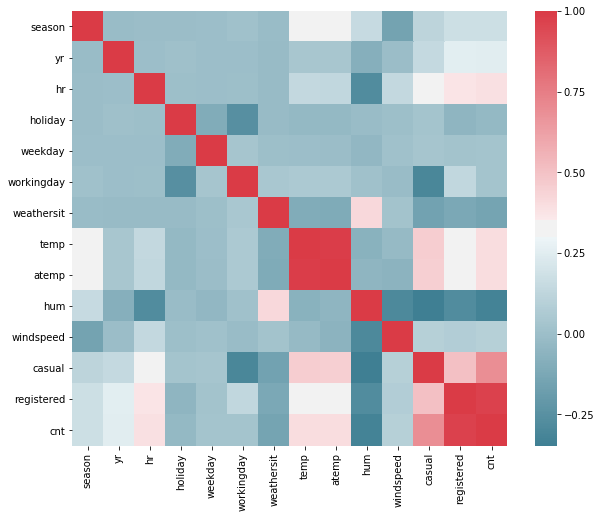

In [263]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

__From the above visualisation , we can say that registered <--> cnt and temp<---->atemp are highly positively correlated.__
__In the same way,   season <--> yr are positively correlated to each other. If one varible changes then the other will also change in the same manner or opposite.__

In [264]:
x= df['mnth']

In [265]:
y=df['season']

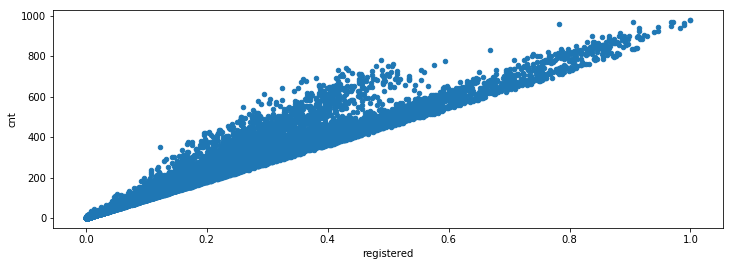

In [266]:
df.plot(kind='scatter',x='registered', y='cnt', figsize=(12,4))

__In the above scatter plot , we can see that how the variable - registered is highly correlated to cnt and the plot is linear which can help us to predict the outcome variable more accurately.__

In [267]:
V1 = df.groupby(['season']).agg({"cnt":"count"})

In [268]:
V1

,cnt
season,
1,4242
2,4409
3,4496
4,4232


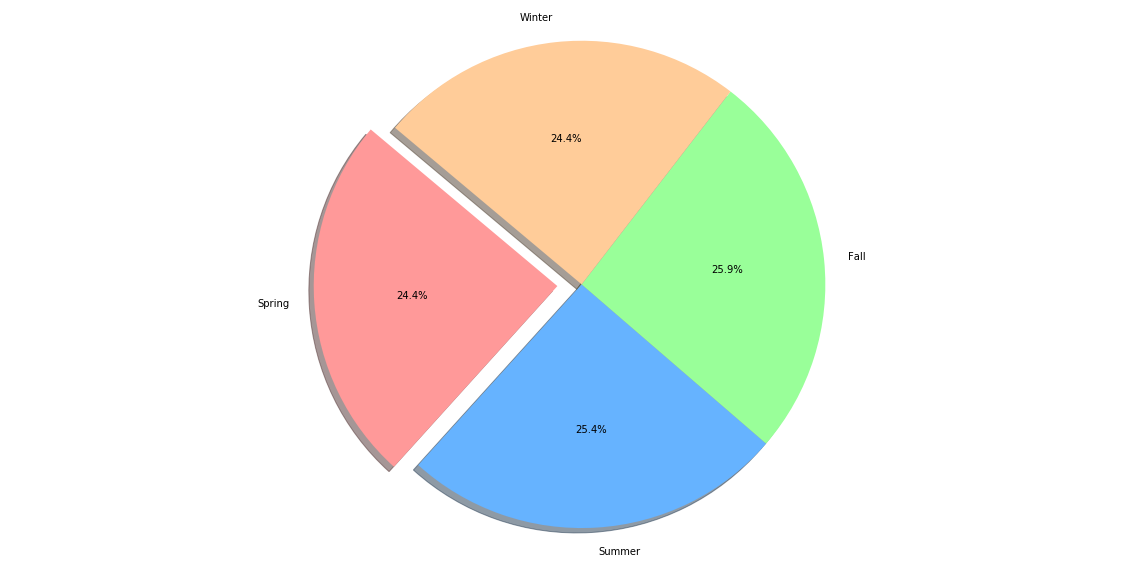

In [272]:
labels = 'Spring', 'Summer', 'Fall', 'Winter'
sizes = V1["cnt"]
colors=['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.1, 0, 0, 0) 

fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(1,1,1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

__From the above visualisation we can say that the no. of bikes are rented over the different season is almost same.__ 

__But during Fall and Summer it has some increase in rented bikes.
Its good to see that bikes are rented throughout the seasons it doesnt matter if it is winter or summer.__

In [273]:
V2 = df.groupby(['mnth']).agg({"cnt":"count"})

In [274]:
V2

,cnt
mnth,
April,1437
August,1475
December,1483
February,1341
January,1429
July,1488
June,1440
March,1473
May,1488


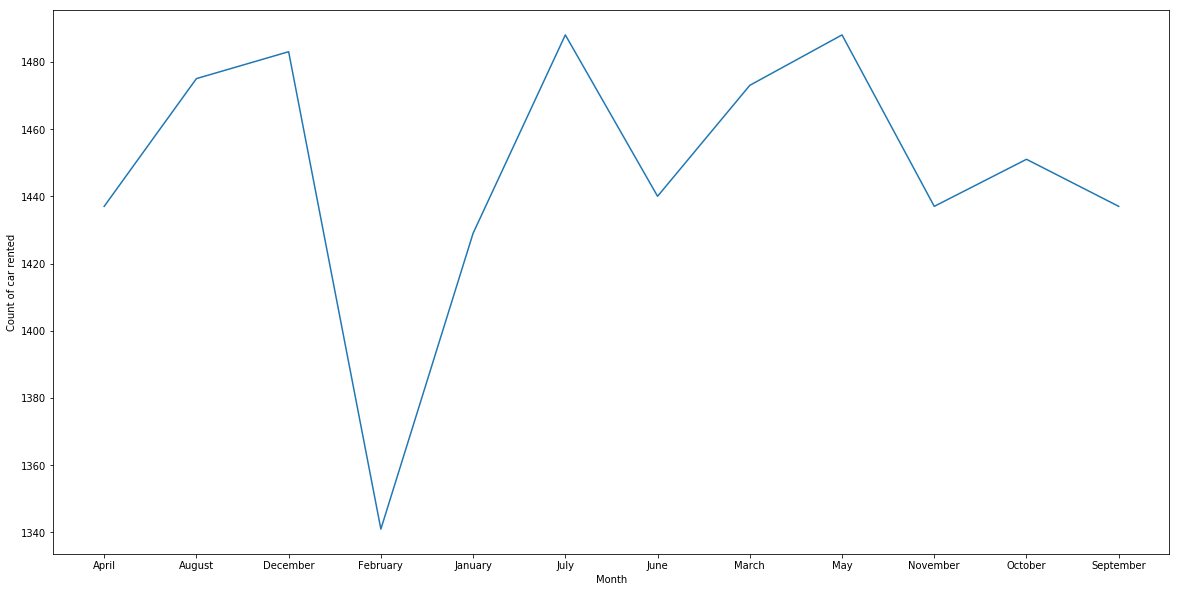

In [275]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(1,1,1)
plt.xlabel("Month") 
plt.ylabel("Count of car rented")
plt.plot(V2)


__From above visulaization, we can see that there is no contant count of bikes rented throughout the years i.e. both 2011 and 2012.__

__We can see that in the month of February there was dip in the bikes rented , it can be possible because of severe winter weather or some reason.___

__In the month of July and May, we can say that the no. of bikes rented is highest maybe beacuse of good weather or some reason.__

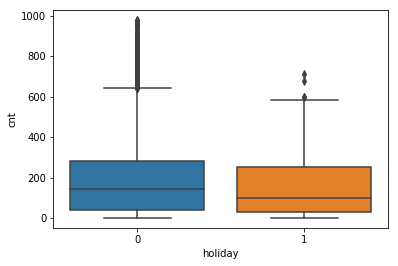

In [276]:
sns.boxplot(data=df,x = "holiday", y = "cnt" )

__Here we can see that the mean of the no. of bikes rented is near 100 on holidays and mean of no. of bikes rented is above 100 or between 150-200 on working days.__ 

__The count of the bikes rented goes from 0 to 650-700 on working day. There are some working days on which the bikes rented has reached till 1000.__

__The count of the bikes rented goes from 0 to 280-300 on holidays.There are some holidays where the count reached till 700-750 but its rare.__

__From this we can say that people dont like to go out in holidays unlike on the working days__

c:\users\rajan\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



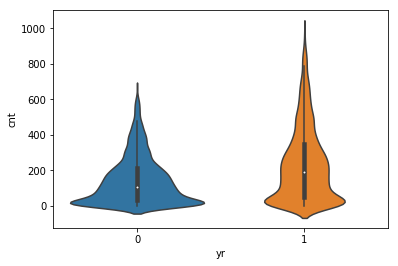

In [277]:
fig.set_size_inches(20, 10)
sns.violinplot(df['yr'],df['cnt'])

__In this violin plot, we can see that 0 and 1 i.e. Year 2011 and 2012 respectively do not have equal sale or count of bikes rented.__

__0 i.e. in 2011, the mean no. of bikes rented were around 100 and the count of bikes rented is majorly between 0 to 100. The maximum count goes till 700 for a day in 2011.__

__1 i.e. in 2012, the mean no. of bikes rented were around 200 and the count of bikes rented is majorly between 0 to 500 which is more then in 2011. The maximum count goes till 1000+ for a day in 2012.__

# Method

__Linear regression is used to predict the value of an outcome variable Y based on one or more input, independent, predictor variables X. The independent variables can be a single variable or multiple variables.__ 

__The aim of the model is to build a linear relationship (a mathematical formula or by statistics analysis) between the predictor variables and the target variable, so that, we can use this formula to estimate the value of the response Y, when we know only the predictor variables X .__

__Linear model is defined as a Euclidean dot product between two vectors:__ 
  
$$
\begin{align}
  f(x; w) &= w^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

__where $w$ is a weight vector and $x$ is an input vector.__

### Advantages of Linear Model

- Simple
- Stable
- Avoid Overfitting
- Scalable


## Least Square method

 __The least square method is a form of regression method that finds the best fit line for a dataset, providing a visual demonstration of the relationship between the data points of the data set.__
 __Each point of data is means the relationship between a known input independent variables and an unknown dependent target variable.__
 
 __Least square can be given in mathematical formula as :__
     $$
w^* = \arg\min_w \sum_{i=1}^{N} \Big( f(x_i; w) - t_i \Big)^2
$$

where 

$$
\begin{align}
t &= [t_1, t_2, \cdots, t_N]^\top \\ 
\\
w &= [w_0, w_1, \cdots, w_D]^\top \\
\\
X &= \begin{bmatrix}
    x_{10} & x_{11} & x_{12} & \dots  & x_{1D} \\
    x_{20} & x_{21} & x_{22} & \dots  & x_{2D} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{N0} & x_{N1} & x_{N2} & \dots  & x_{ND}
\end{bmatrix}
\end{align}
$$

Further we can formulate as 
$$
\begin{align}
w &= \big(X^\top X\big)^{-1} X^\top t
\end{align}
$$


## Least Mean Square Method 

__The least mean square (LMS) Method uses a gradient - based algorithm of steepest decent. LMS algorithm uses the result of the gradient vector from the available dataset.It also tries to proceed in iterative procedure that makes repeated correction to the weight vector in the direction of the negative of the gradient vector that leads to the minimum mean square error.__

__LMS algorithm is relatively simple.__

__It follows sequential or online learning procedure i.e it first computes weight $w$ which is updated iteratively with error , samples and learning rate.This process is called stochastic gradient descent or sequential gradient descent.__

__LMS can be given in mathematical formula as :__

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$

__Further we can formulate as :__

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

In [278]:
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least square execution :

__Here we implement least square algorirhm by using the abstarct class Linear model which is already given above.__

__In this first we write a method to train least square model for this we first check if the matrix is 2 dimensional or not if not it raises exception else it adds ones to make n+1 dimensional matrix. We do this to calculate Weight vector by using formula as we did below.__

__Once we are done with train method we move to use method which is used to predict the values by taking the calculated weight vector i.e. finding output value we take dot product of calculated weight ($w$) and input predictor variable ($X$).__

In [279]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
   
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = super().add_ones(X)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ T 
        return self.w
    
    # apply the learned model to data X
    def use(self, X):
        X = super().add_ones(X)
        Y= X @ self.w
        return Y

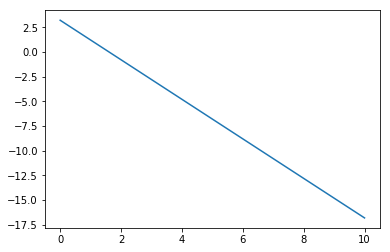

In [280]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

### Least Mean Square Execution:

__Here we implement least mean square algorirhm by using the abstarct class Linear model which is already given above.__

__In this we try to define three methods , one additional as compared to LS.__

__In train_step method , we try to calculate weight vector by taking each record from the training dataset and calculate accordingly. In this we try to reshape $X$ independent variable to use it in Weight calculation.__

__In train method, we try to call train_step method in iteration for each training record in dataset which can be used in use method for the dot product to get the target value $Y$__ 

In [281]:
# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for i in range(X.shape[0]):
            self.train_step(X[i],T[i])
        
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = np.hstack([1,x]) 
        x = x.reshape(-1,1)
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
        self.w -=  self.alpha * (self.w.T @ x - t) * x
        
    
    # apply the current model to data X
    def use(self, X):
        X = super().add_ones(X)
        Y = X @ self.w
        return Y

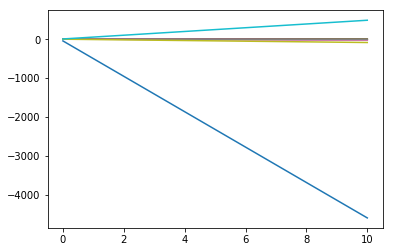

In [282]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

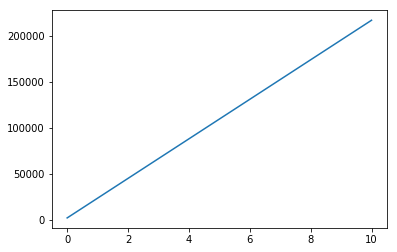

In [283]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments:

__Here we are applying the above models to the data we have considered for regression analysis.__

__In this data we have considered weather and users(Casual and Registered) factors for predicting count of bikes rented hourly for days in both the years i.e. 2011 and 2012 .__

__In the below section we will be implementing the LS and LMS models we coded and will run on our data .__


In [284]:
df1= df[['registered','casual','temp','atemp','cnt']]

In [285]:
df1

,registered,casual,temp,atemp,cnt
0,0.014673,0.008174,0.24,0.2879,16
1,0.036117,0.021798,0.22,0.2727,40
2,0.030474,0.013624,0.22,0.2727,32
3,0.011287,0.008174,0.24,0.2879,13
4,0.001129,0.000000,0.24,0.2879,1
5,0.001129,0.000000,0.24,0.2576,1
6,0.000000,0.005450,0.22,0.2727,2
7,0.002257,0.002725,0.20,0.2576,3
8,0.007901,0.002725,0.24,0.2879,8
9,0.006772,0.021798,0.32,0.3485,14


__Here we are going to take all the independent predictor variable we consider into an array i.e. X and target variable as Y__

In [286]:
X = df1.iloc[:,0:4].values

In [287]:
X.shape

(17379, 4)

In [288]:
T = df1.iloc[:,-1:].values
T.shape

(17379, 1)

In [289]:
X

array([[0.01467269, 0.00817439, 0.24      , 0.2879    ],
       [0.03611738, 0.02179837, 0.22      , 0.2727    ],
       [0.03047404, 0.01362398, 0.22      , 0.2727    ],
       ...,
       [0.09367946, 0.01907357, 0.26      , 0.2576    ],
       [0.05417607, 0.03542234, 0.26      , 0.2727    ],
       [0.04176072, 0.03269755, 0.26      , 0.2727    ]])

In [290]:
T

array([[16],
       [40],
       [32],
       ...,
       [90],
       [61],
       [49]], dtype=int64)

In [291]:
from sklearn.model_selection import train_test_split

__In this we are partitioning the data into Training data and Test Data in the ratio of 80:20 respectively . As professor didnt tell explicityly about not using the scikit - learn and wanted to use these package for small pupose to learn this as well. So I used Scikit learn as mentioned in the textbook.__

In [292]:
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size = 0.20)

In [293]:
T_test

array([[ 19],
       [ 56],
       [421],
       ...,
       [472],
       [  3],
       [ 35]], dtype=int64)

In [294]:
T_train.shape

(13903, 1)

In [295]:
X_train.shape

(13903, 4)

__In the below section we are going to implement Least Square on the dataset and lets check the model ...__

In [296]:
ls = LinearRegress()

In [297]:
ls.train(X_train, T_train)

array([[-1.12330961e-11],
       [ 8.86000000e+02],
       [ 3.67000000e+02],
       [ 1.69683989e-11],
       [ 4.31502056e-12]])

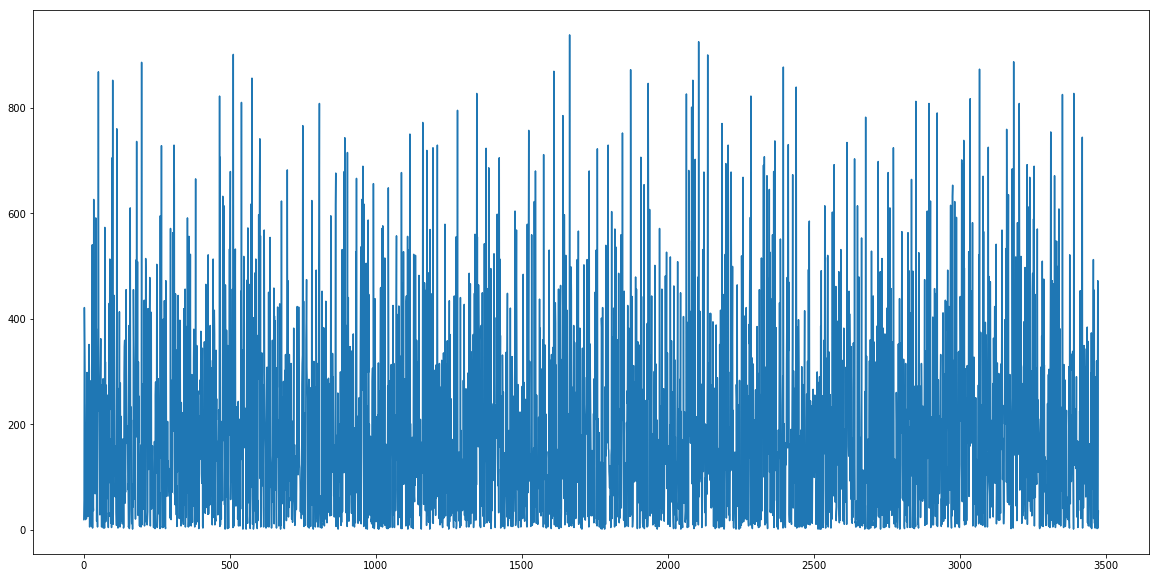

In [301]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(1,1,1)
plt.plot(ls.use(X_test))

In [302]:
prediction1 = ls.use(X_test)
prediction1

array([[ 19.],
       [ 56.],
       [421.],
       ...,
       [472.],
       [  3.],
       [ 35.]])

In [303]:
T_test

array([[ 19],
       [ 56],
       [421],
       ...,
       [472],
       [  3],
       [ 35]], dtype=int64)

In [304]:
predict = prediction1[0::100]

In [305]:
Test = T_test[0::100]

In [306]:
Test.shape

(35, 1)

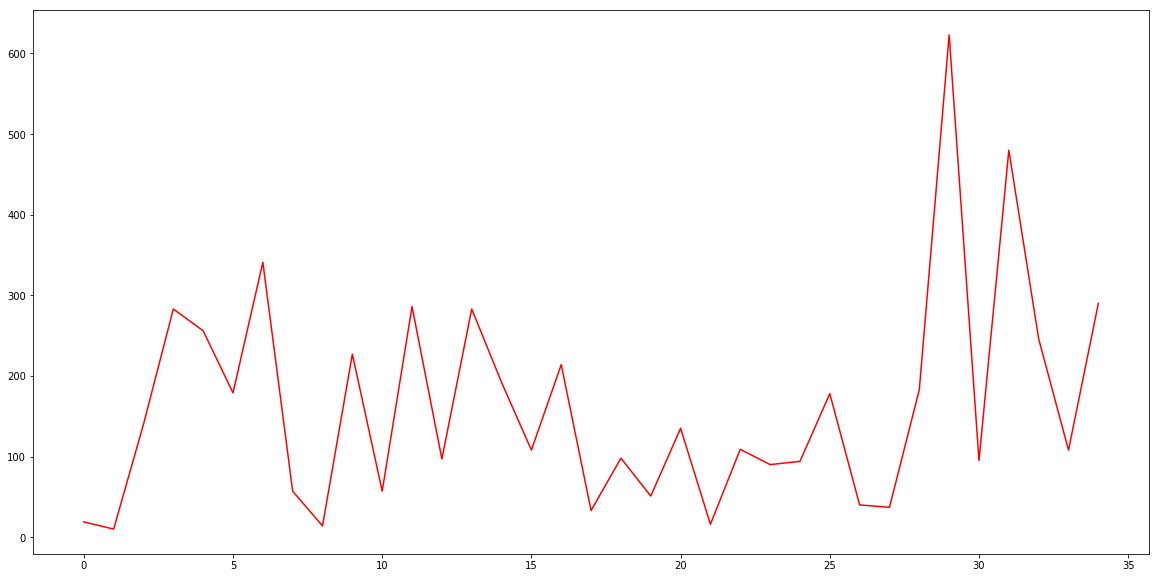

In [309]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(1,1,1)
plt.plot(predict,color='red')


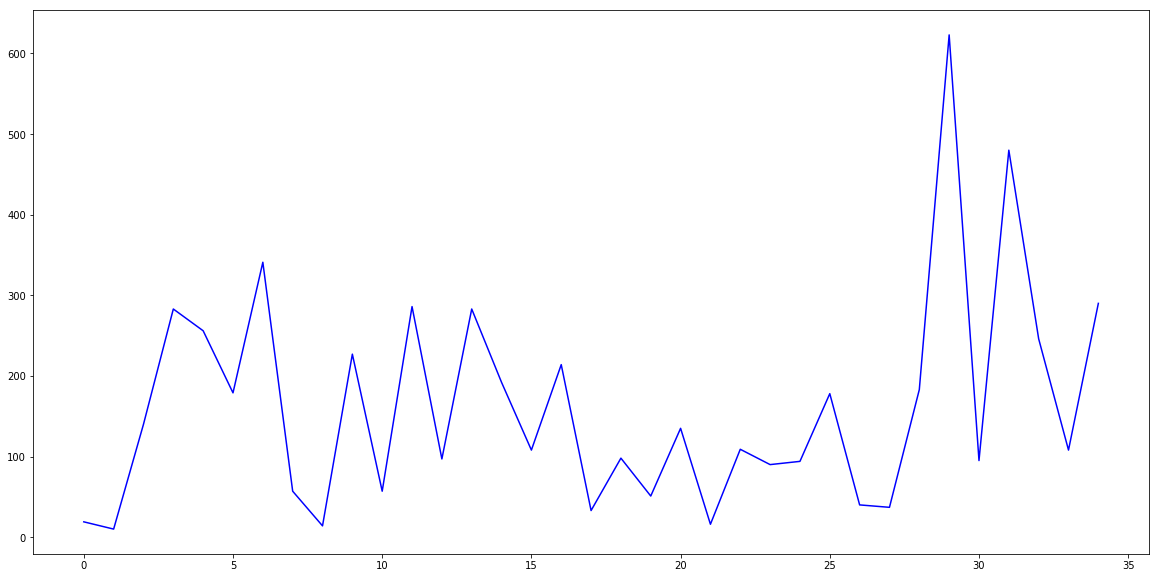

In [310]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(1,1,1)
plt.plot(Test,color='blue')

__In the above visualizations , we can see that both the sample of test data and sample of predicted data are exactly matching. I tried to plot both in graph but it was overlapping and couldnt guess which values they are.__

__For the model evealuation in regression analysis we always tend to use RMSE - Root Mean Square Error . For our model also we try to find out RMSE for evaluation.__

In [311]:
def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

In [312]:
Error = rmse(T_test,prediction1)
Error

2.4769353291236155e-10

__In the below section we are going to implement Least Mean Square on the dataset and lets check the model ...__

In [313]:
lms = LMS(0.1)

In [314]:
lms.train(X_train, T_train)

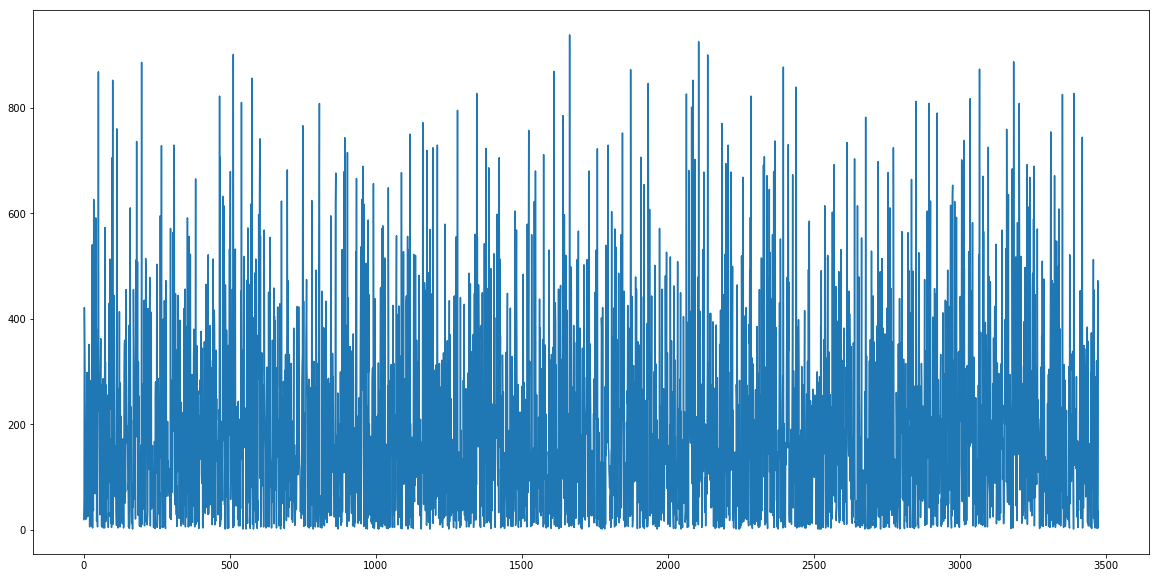

In [316]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(1,1,1)
plt.plot(lms.use(X_test))

In [317]:
T_test

array([[ 19],
       [ 56],
       [421],
       ...,
       [472],
       [  3],
       [ 35]], dtype=int64)

In [318]:
prediction2 = lms.use(X_test)

In [319]:
predict1 = prediction2[0::200]

In [320]:
Test1 = T_test[0::200]

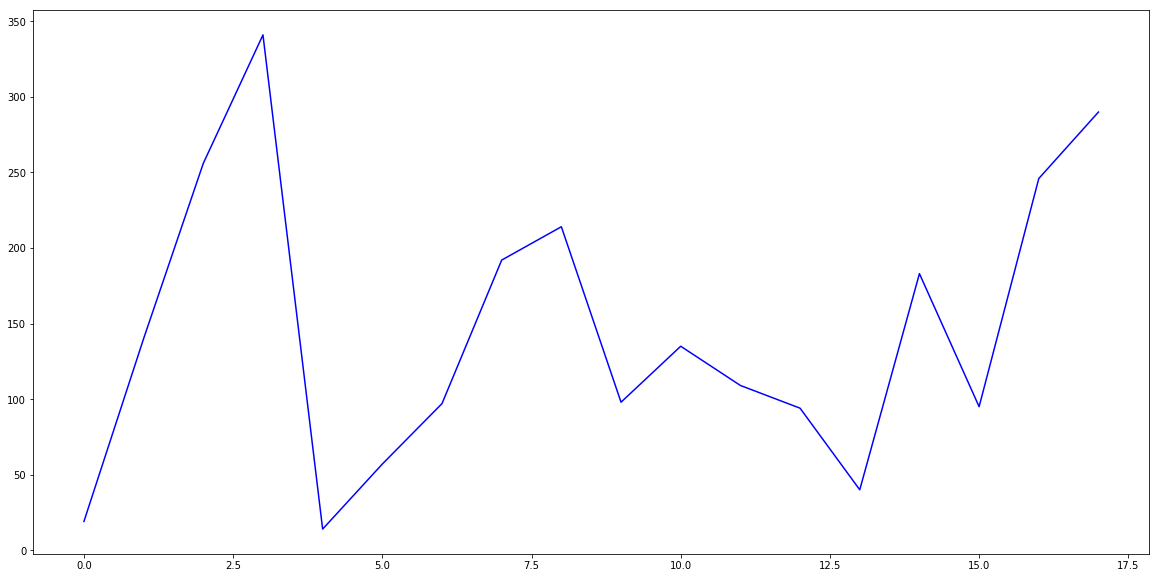

In [322]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(1,1,1)
plt.plot(predict1,color='blue')


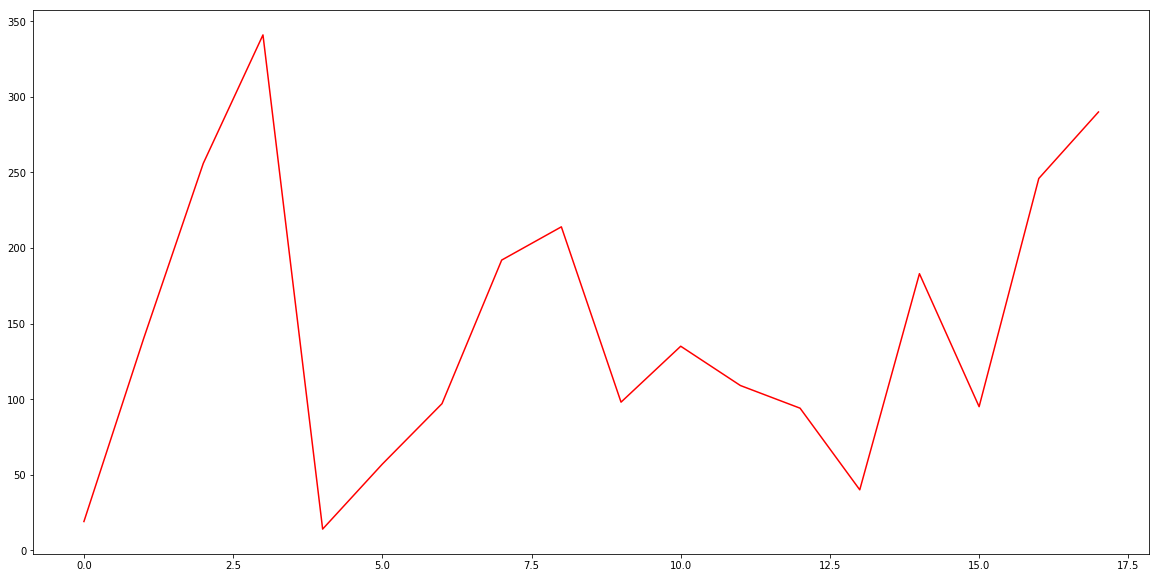

In [323]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(1,1,1)
plt.plot(Test1,color='red')

__In the above visualizations , we can see that both the sample of test data and sample of predicted data are exactly matching. I tried to plot both in graph but it was overlapping and couldnt guess which values they are.__

__For the model evealuation in regression analysis we always tend to use RMSE - Root Mean Square Error . For our model also we try to find out RMSE for evaluation.__

In [324]:
Error1 = rmse(T_test,prediction2)
Error1

3.4449482160262574

In [325]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


### Comparison of Algorithms

__From the above analysis, we can say that the Least square model is more accurate than the Least mean square . We also saw that the prediction value and test value were exact same when we used least square. But when we used the least mean square , we could see that there was slight difference in prediction values and test values. Also the RMSE of Least Square is less then Least mean sqaure which shows that LS is better than LMS.__ 

# Conclusion:



__From these linear regression analysis , I could learn many aspects of regression as I was naive for this domain. I learnt how to select the features of certain data and learn to compute certain calculation done while building model i.e least square and least mean square which I never came across. I could learn some python libraries used for data partition or displaying predicted data and test data. I learnt that the for linear regression or to predict any single data it should be linear with predictor.__

__But while doing this , I came across many problems that are:__

__I was getting confused between dot multiplication and normal one which was difficult to do calculation and transform it into code from scratch but I overcame that difficulty by going through many resources and books, also tried to solve first on book and then implement accordingly.__

__I also faced problem in Latex which I couldnt do it till the end as it was getting crashed. I am going to solve that issue very soon.__

__Therefore I could learn many things and going to help me in my future Machine learning algorithm analysis.__

# Reference

1. https://pythonspot.com/matplotlib-bar-chart/

2. https://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average

3. https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

4. https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Model.ipynb

5. https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/ForestFire.ipynb

6. Ventsislav Yordanov, Jul 21, 2018 , Data Science with Python: Intro to Data Visualization with Matplotlib (https://towardsdatascience.com/data-science-with-python-intro-to-data-visualization-and-matplotlib-5f799b7c6d82)

7. Adarsh Menon, Sep 8, 2018, Linear Regression Using Least Squares (https://towardsdatascience.com/linear-regression-using-least-squares-a4c3456e8570)

# Extra Grade:



__Additional Analysis:__
    
   - __what is the most and least significant features for your data.__
   
__Here to answer this question , we can do correlation to find the most significant features for our data while we are predicting__

In [326]:
corr.style.background_gradient()

,season,yr,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1,-0.0107425,-0.0061169,-0.00958453,-0.00233535,0.0137431,-0.0145236,0.312025,0.31938,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,-0.0107425,1,-0.003867,0.00669162,-0.00448485,-0.00219601,-0.0191569,0.0409134,0.0392216,-0.0835464,-0.00873953,0.142779,0.253684,0.250495
hr,-0.0061169,-0.003867,1,0.000479136,-0.00349774,0.002285,-0.0202025,0.137603,0.13375,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.00958453,0.00669162,0.000479136,1,-0.102088,-0.252471,-0.0170361,-0.0273405,-0.0309727,-0.0105885,0.00398763,0.0315636,-0.0473454,-0.0309273
weekday,-0.00233535,-0.00448485,-0.00349774,-0.102088,1,0.0359551,0.00331074,-0.00179493,-0.00882094,-0.0371583,0.0115015,0.0327214,0.0215779,0.0268999
workingday,0.0137431,-0.00219601,0.002285,-0.252471,0.0359551,1,0.0446722,0.0553903,0.0546672,0.0156875,-0.0118298,-0.300942,0.134326,0.0302844
weathersit,-0.0145236,-0.0191569,-0.0202025,-0.0170361,0.00331074,0.0446722,1,-0.10264,-0.105563,0.41813,0.0262257,-0.152628,-0.120966,-0.142426
temp,0.312025,0.0409134,0.137603,-0.0273405,-0.00179493,0.0553903,-0.10264,1,0.987672,-0.0698814,-0.0231253,0.459616,0.335361,0.404772
atemp,0.31938,0.0392216,0.13375,-0.0309727,-0.00882094,0.0546672,-0.105563,0.987672,1,-0.0519177,-0.062336,0.45408,0.332559,0.400929
hum,0.150625,-0.0835464,-0.276498,-0.0105885,-0.0371583,0.0156875,0.41813,-0.0698814,-0.0519177,1,-0.290105,-0.347028,-0.273933,-0.322911


__From the above visualization , we can say that registered variable is highly correlated with cnt variable. After registered , causal is also highly correlated to cnt variable.
The least significant feature i.e. least correlated variable with cnt variable is Holiday i.e. it is negatively least correlated.__



- __what are the consequences if you remove those features from the model ?__

__For these question , we will take whole dataset , do the partition and see what are the effects if we remove highly significant variable or least significant variable.__

__Using Least square method : removing most significant variable__

In [327]:
df2 = df1.drop('registered', 1)

In [328]:
X1 = df2.iloc[:,0:3].values

In [329]:
T1 = df2.iloc[:,-1:].values

In [330]:
X1_train, X1_test, T1_train, T1_test = train_test_split(X1, T1, test_size = 0.20)

In [331]:
ls.train(X1_train, T1_train)

array([[ 52.86319188],
       [871.64748514],
       [ 66.33834469],
       [ 39.78626423]])

In [332]:
p = ls.use(X1_test)

In [333]:
p

array([[199.87965266],
       [105.76826691],
       [198.09752278],
       ...,
       [131.30949357],
       [107.65531457],
       [151.78549593]])

In [334]:
T1_test

array([[797],
       [ 11],
       [121],
       ...,
       [ 59],
       [344],
       [759]], dtype=int64)

__From the above , we can see that if we remove most significant variable , it can effect the prediction models accuracy . Also we can see in the plot as well shown below__

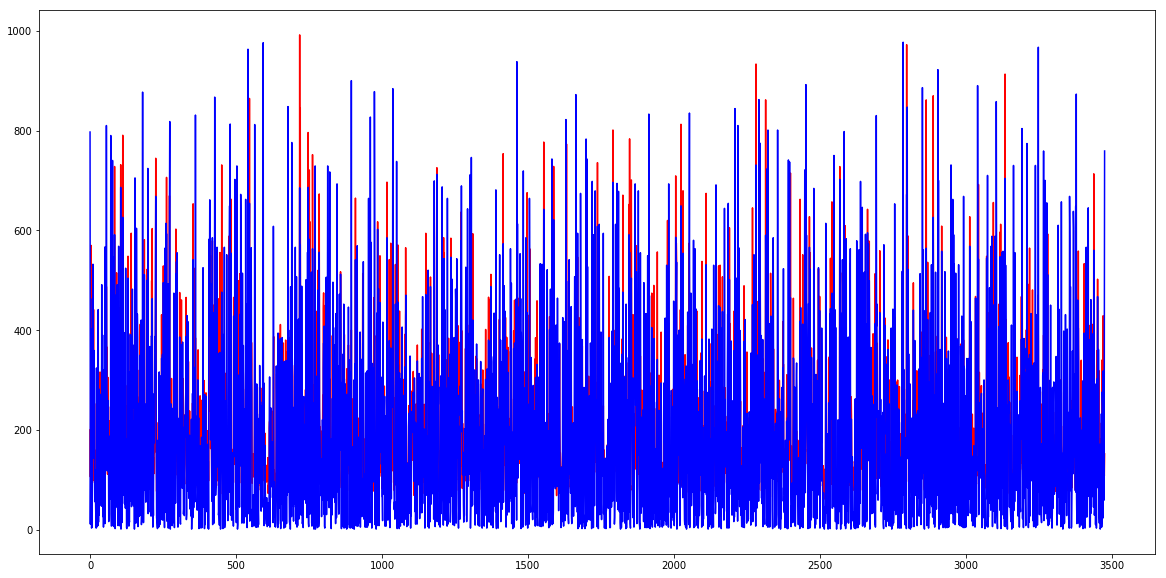

In [336]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(1,1,1)
plt.plot(p,color='red')
plt.plot(T1_test,color='blue')

__Using Least mean square method__:

In [337]:
lms = LMS(0.1)

In [338]:
lms.train(X1_train, T1_train)

In [339]:
p1 = lms.use(X1_test)

In [340]:
p1

array([[155.41665164],
       [ 60.67192241],
       [151.1552683 ],
       ...,
       [ 81.90672368],
       [ 68.92744814],
       [108.81843901]])

In [341]:
T1_test

array([[797],
       [ 11],
       [121],
       ...,
       [ 59],
       [344],
       [759]], dtype=int64)

__From the above , we can see that if we remove most significant variable , it can effect the prediction models accuracy predicting incorrect value . Also we can see in the plot as well shown below__

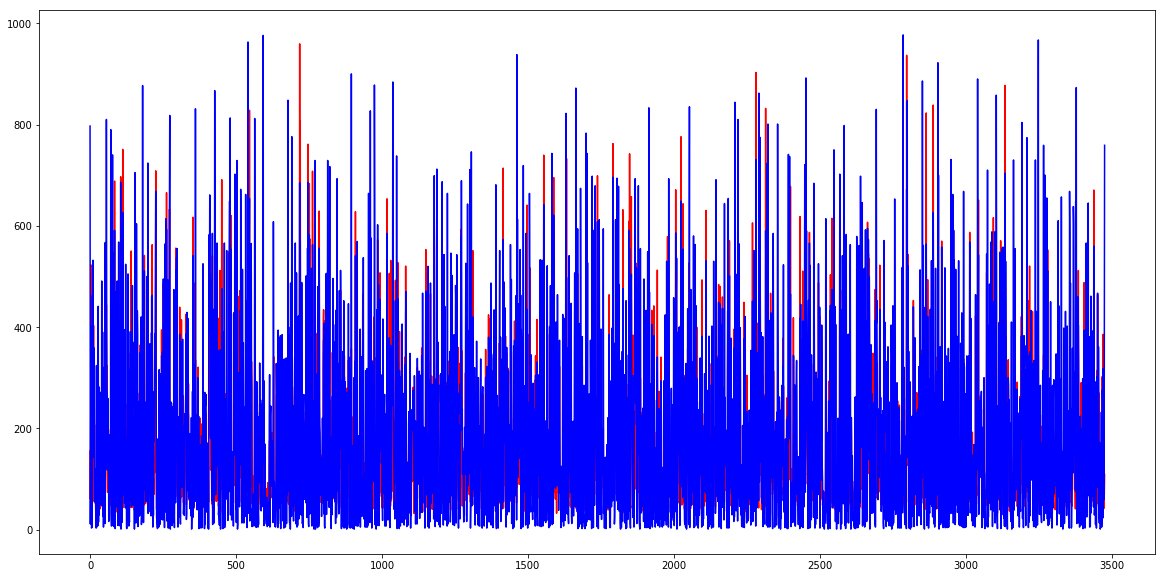

In [342]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(1,1,1)
plt.plot(p1,color='red')
plt.plot(T1_test,color='blue')

__Using Least Square method: removing least significant varibale from dataset considered__

In [343]:
df3 = df1.drop('atemp',1)

In [344]:
df3

,registered,casual,temp,cnt
0,0.014673,0.008174,0.24,16
1,0.036117,0.021798,0.22,40
2,0.030474,0.013624,0.22,32
3,0.011287,0.008174,0.24,13
4,0.001129,0.000000,0.24,1
5,0.001129,0.000000,0.24,1
6,0.000000,0.005450,0.22,2
7,0.002257,0.002725,0.20,3
8,0.007901,0.002725,0.24,8
9,0.006772,0.021798,0.32,14


In [345]:
X2 = df3.iloc[:,0:3].values

In [346]:
T2 = df3.iloc[:,-1:].values

In [347]:
X2_train, X2_test, T2_train, T2_test = train_test_split(X2, T2, test_size = 0.20)

In [348]:
ls.train(X2_train, T2_train)

array([[-7.67087782e-13],
       [ 8.86000000e+02],
       [ 3.67000000e+02],
       [ 1.33551503e-12]])

In [349]:
pred = ls.use(X2_test)

In [350]:
pred

array([[ 55.],
       [400.],
       [157.],
       ...,
       [  5.],
       [163.],
       [287.]])

In [351]:
T2_test

array([[ 55],
       [400],
       [157],
       ...,
       [  5],
       [163],
       [287]], dtype=int64)

__From the above , we can see that if we remove most significant variable , it didnt effect the prediction models accuracy as we are getting exact prediction of values.__

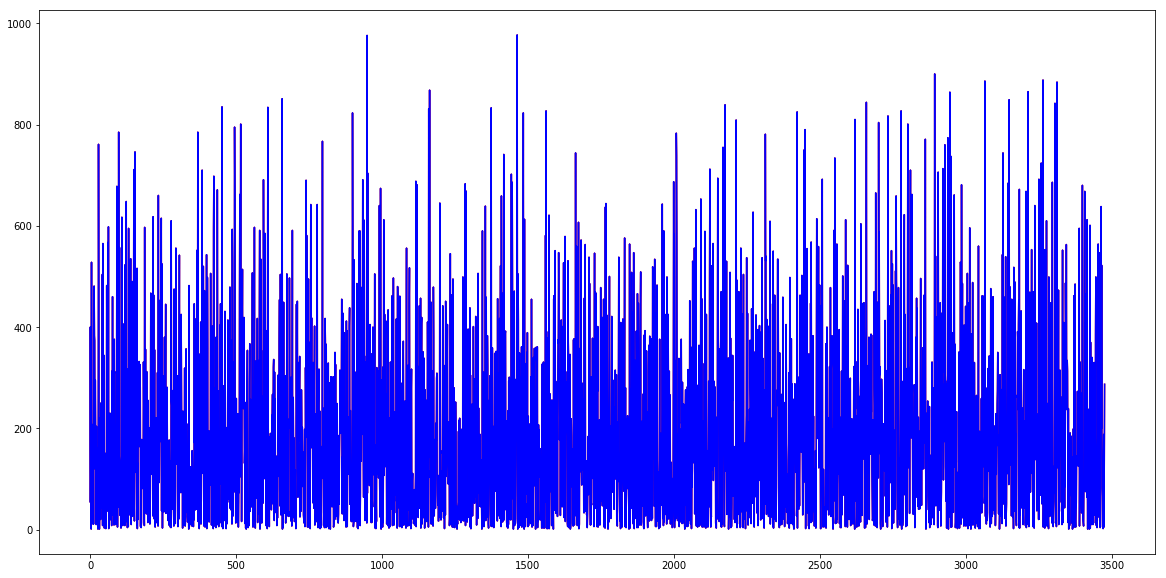

In [352]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(1,1,1)
plt.plot(pred,color='red')
plt.plot(T2_test,color='blue')

__Using Least mean square method: Removing least significant variable from dataset considered__

In [353]:
lms.train(X2_train, T2_train)

In [354]:
pred1 = lms.use(X2_test)

In [355]:
pred1

array([[ 54.99998767],
       [400.00002952],
       [157.00000873],
       ...,
       [  5.00001758],
       [163.0000402 ],
       [287.00002799]])

In [356]:
T2_test

array([[ 55],
       [400],
       [157],
       ...,
       [  5],
       [163],
       [287]], dtype=int64)

__From the above , we can see that if we remove most significant variable , it didnt effect the prediction models accuracy as we are getting almost the exact prediction of values.__

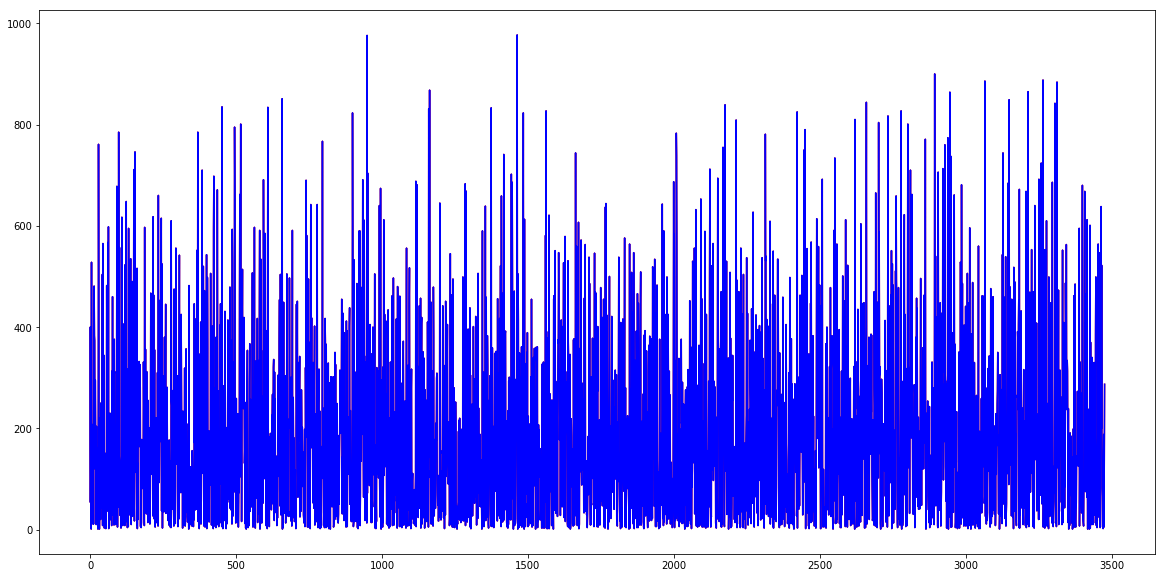

In [357]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(1,1,1)
plt.plot(pred1,color='red')
plt.plot(T2_test,color='blue')

__Hence, we can conclude that we should choose only significant variables to predict target variables to achieve accurate model and values .__